In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\jacks\OneDrive\Documents\Elise\Instacart-Basket'

In [3]:
df= pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_merged.pkl'))

In [7]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,First_name,last_name,Gender,State,Age,date_joined,No_of_Dependants,Marital_status,Income
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196.0,1.0,1.0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


## 3. Follow instructions to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart

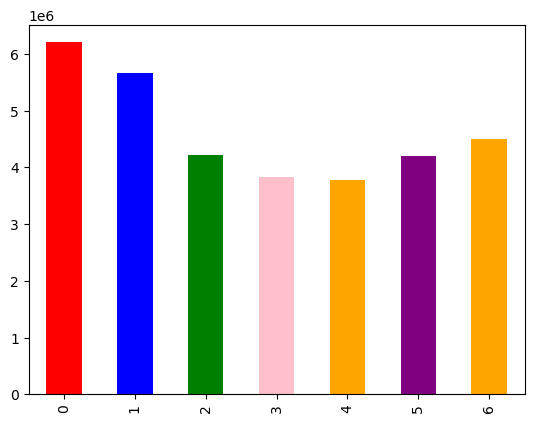

In [13]:
# Bar chart



bar = df['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['red', 'blue', 'green', 'pink', 'orange', 'purple', 'orange'])

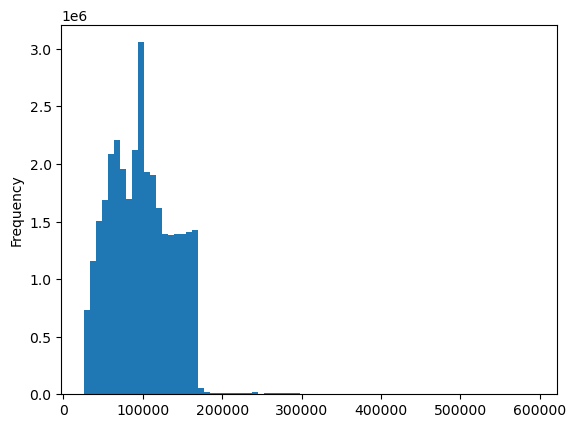

In [15]:
# Histogram


hist = df['Income'].plot.hist(bins=75)

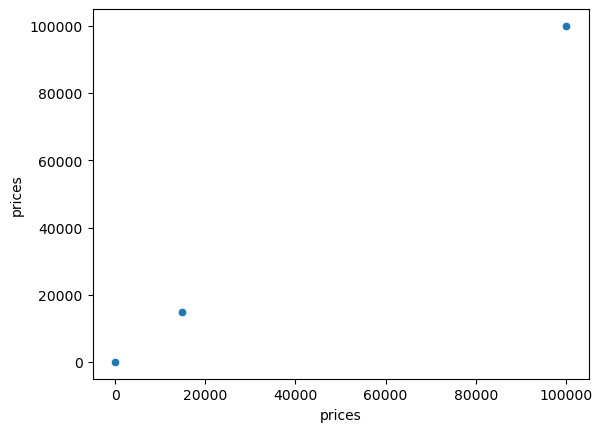

In [16]:
# Scatterplot


splot = sns.scatterplot(x = 'prices', y = 'prices', data = df)

In [17]:
# Define the sub set of the df for the line chart (plotting the top 1 million)
# Creating a random sampling

np.random.seed(4)

In [18]:
dev = np.random.rand(len(df)) <= 0.7

In [20]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [21]:
#Split the dataframe (70% of the sample in the dataframe)

big = df[dev]

In [22]:
#split the dataframe (30% of the sample in the dataframe)

small = df[~dev]

In [23]:
#checking the execution for accuraccy

len(df)

32406041

In [24]:
len(big) + len(small)

32406041

In [25]:
# select the columns needed line plot

df_complete_data2 = small[['orders_day_of_week', 'prices']]

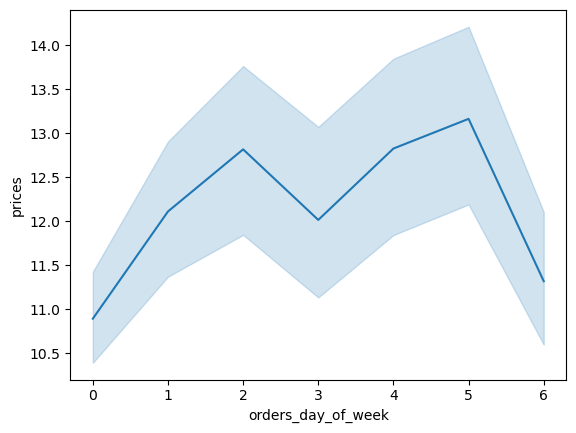

In [26]:
line = sns.lineplot(data = df_complete_data2, x = 'orders_day_of_week',y = 'prices')

## 3. Create a histogram of the “order_hour_of_day” column.

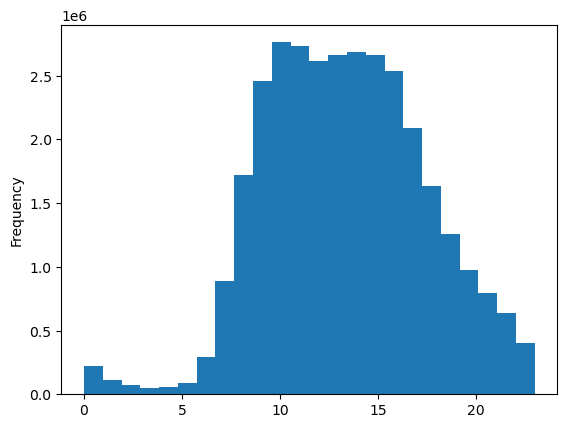

In [27]:
hist_hour = df['order_hour_of_day'].plot.hist(bins = 24)

In [28]:
### The above histogram shows the number of  hours of the day (0 - 23 hour) and the total amount of orders placed for each hour (in millions)

## The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

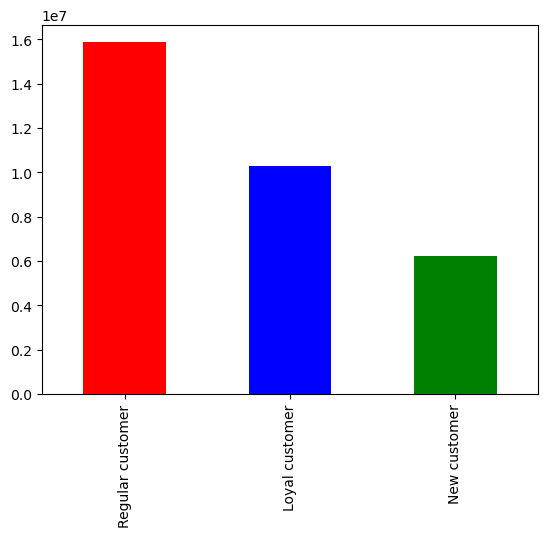

In [29]:
#plotting bar chart for the loyalty flag\n",
loyalty_bar = df['loyalty_flag'].value_counts().plot.bar(color = ['red', 'blue', 'green'])

## Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day.
## (Hint: To check this, you need to use an accurate sample for your line chart!)

In [30]:
# Using the earlier splitted data of 30% and selecting the right columns

df_prices_hour = small[['order_hour_of_day', 'prices']]

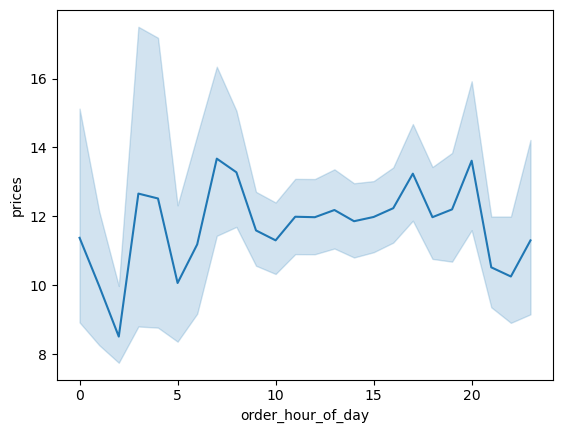

In [31]:
# Create line chart

line2 = sns.lineplot(data = df_prices_hour, x = 'order_hour_of_day', y = 'prices')

### Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:

In [34]:
#using the earlier splitted data of 30% and selecting the right columns
df_fam_status_age = small [['No_of_Dependants', 'Age']]

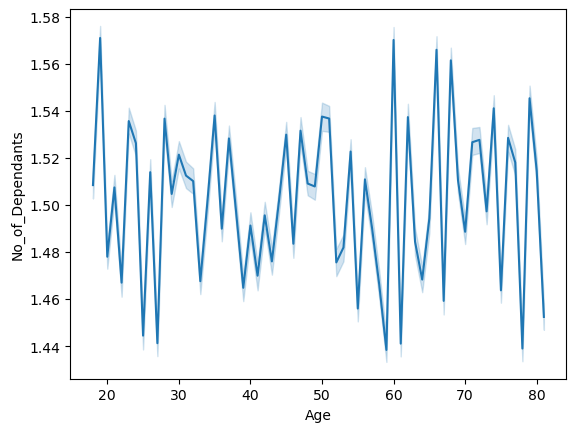

In [36]:
#create line chart

line3 = sns.lineplot(data = df_fam_status_age, x = 'Age', y = 'No_of_Dependants')

In [37]:
## The line chart shows the relationship between customer's age and the number of dependents in each family.

## You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

In [39]:
# Using the earlier splitted data of 30% and selecting the right columns\n",

df_income_age = small [['Income', 'Age']]

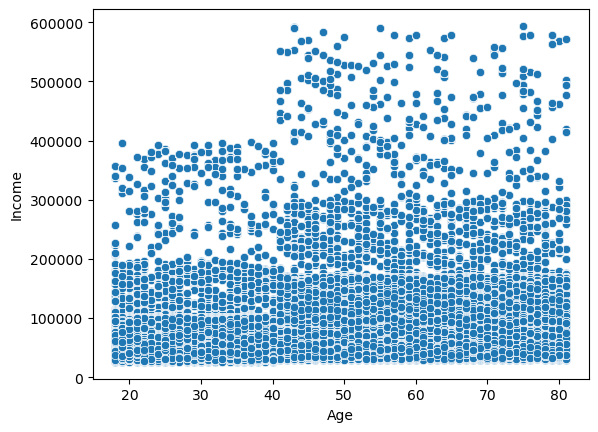

In [41]:
# create scatter plot

plot_spending = sns.scatterplot(x = 'Age', y = 'Income', data = df_income_age)

In [42]:
## In conclusion, instacart customers 40 years and above might spend more base on their higher income earnings.

In [43]:
bar.figure.savefig(os.path.join(path, 'bar_4_9.png'))

In [44]:
hist.figure.savefig(os.path.join(path, 'hist_4_9.png'))

In [45]:
splot.figure.savefig(os.path.join(path, 'splot_4_9.png'))

In [46]:
line.figure.savefig(os.path.join(path, 'line_4_9.png'))

In [47]:
hist_hour.figure.savefig(os.path.join(path,  'hist_hour_4_9.png'))

In [48]:
loyalty_bar.figure.savefig(os.path.join(path,  'loyalty_bar_4_9.png'))

In [49]:
line2.figure.savefig(os.path.join(path,  'line_prices_hour_4_9.png'))

In [50]:
line3.figure.savefig(os.path.join(path, 'line_age_deps_4_9.png'))

In [51]:
plot_spending.figure.savefig(os.path.join(path, 'scatter_spending_power_4_9.png'))